In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_countries(data):
    fig = plt.figure(figsize=(16, 8))
    sns.set_theme(style="darkgrid")
    sns.lineplot(data=data, y='ALL_INF', x = 'SDATE', hue='Country', legend=False)
    plt.show()

Load the data

In [155]:
df = pd.read_csv('influenza_weekly.csv', low_memory=False)
df['SDATE'] = pd.to_datetime(df['SDATE'])
display(df.head())

countries = pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv')
display(countries.head())

,REPORT_ID,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,1048,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,5,2015-01-26,2015-02-01,43.0,43.0,...,0.0,0.0,1,0.0,3.0,0.0,3,4,NaN,Sporadic
1,1059,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,16,2015-04-13,2015-04-19,22.0,22.0,...,0.0,0.0,1,0.0,0.0,0.0,0,1,NaN,Sporadic
2,1060,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,17,2015-04-20,2015-04-26,26.0,26.0,...,0.0,0.0,1,0.0,0.0,0.0,0,1,NaN,Sporadic
3,1061,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,18,2015-04-27,2015-05-03,17.0,17.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,NaN,Sporadic
4,1062,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,19,2015-05-04,2015-05-10,23.0,23.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,NaN,Sporadic


,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


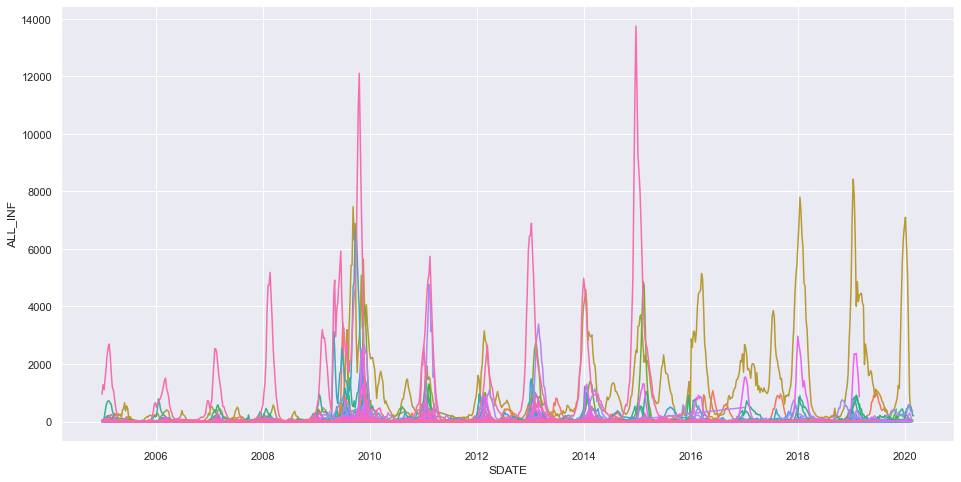

In [156]:
plot_countries(df)

In [157]:
# Find a year with lots of data to just work on that later
df.groupby('Year').count().sort_values('REPORT_ID', ascending=False).head(5)

,REPORT_ID,Country,WHOREGION,FLUREGION,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
Year,,,,,,,,,,,,,,,,,,,,,
2012,3999,3999,3999,3999,3999,3999,3999,2467,3908,3999,...,2588,3998,3999,3999,3999,3999,3999,3999,360,3999
2011,3892,3892,3892,3892,3892,3892,3892,2385,3813,3892,...,2518,3892,3892,3892,3892,3892,3892,3892,411,3892
2013,3873,3873,3873,3873,3873,3873,3873,2343,3788,3873,...,2453,3873,3873,3873,3873,3873,3873,3873,253,3873
2010,3553,3553,3553,3553,3553,3553,3553,2537,3457,3553,...,2664,3553,3553,3502,3502,3553,3553,3553,466,3553
2014,3113,3113,3113,3113,3113,3113,3113,2268,3038,3113,...,2379,3113,3113,3113,3113,3113,3113,3113,238,3113


In [158]:
# Filter to single flu season
# 2011-2012 and
# Filter to Europe only
df3 = df[(df['SDATE']>'2011-11-01')&(df['SDATE']<'2012-10-31')&(df['WHOREGION']=='European Region of WHO')].sort_values(['SDATE', 'Country'])

Add lat/lon of countries

In [159]:
display(set(df3.Country.unique())-set(countries.country.unique()))

missing_countries = {'Czechia':'Czech Republic',
 'Republic of Moldova': 'Moldova',
 'Russian Federation': 'Russia',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}

df4 = df3.replace({'Country': missing_countries})
df4.head()

{'Czechia',
 'Republic of Moldova',
 'Russian Federation',
 'United Kingdom of Great Britain and Northern Ireland'}

,REPORT_ID,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
62,2194,Albania,European Region of WHO,South West Europe,2011,45,2011-11-07,2011-11-13,NaN,0.0,...,NaN,0.0,0,0.0,0.0,0.0,0,0,NaN,No Activity
2166,14020,Austria,European Region of WHO,South West Europe,2011,45,2011-11-07,2011-11-13,NaN,39.0,...,NaN,0.0,0,0.0,0.0,0.0,0,0,NaN,No Activity
3249,21904,Belarus,European Region of WHO,Eastern Europe,2011,45,2011-11-07,2011-11-13,NaN,65.0,...,NaN,0.0,0,0.0,0.0,0.0,0,0,NaN,No Activity
3559,23218,Belgium,European Region of WHO,South West Europe,2011,45,2011-11-07,2011-11-13,NaN,11.0,...,NaN,0.0,0,0.0,0.0,0.0,0,0,NaN,No Activity
4887,32416,Bulgaria,European Region of WHO,Eastern Europe,2011,45,2011-11-07,2011-11-13,NaN,7.0,...,NaN,0.0,0,0.0,0.0,0.0,0,0,NaN,No Activity


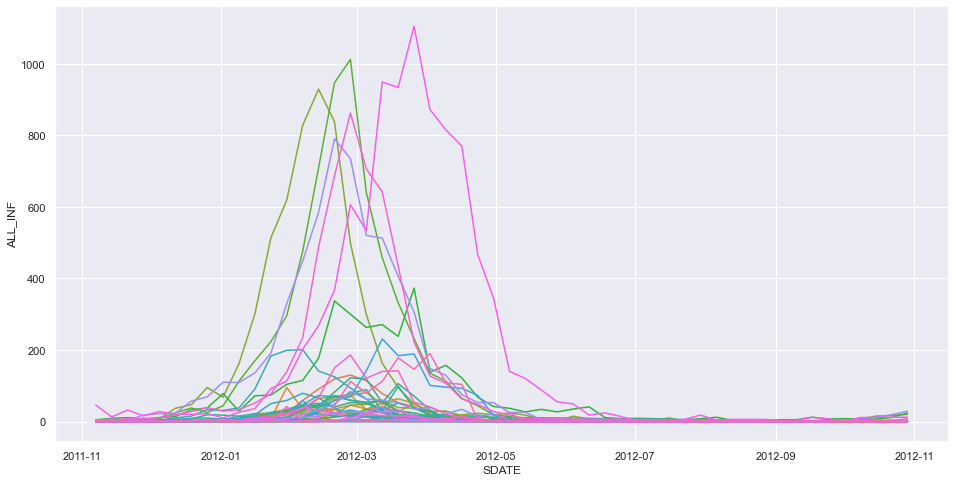

In [160]:
df5 = pd.merge(countries[['country', 'latitude', 'longitude']], df4, left_on='country', right_on='Country')
plot_countries(df5)

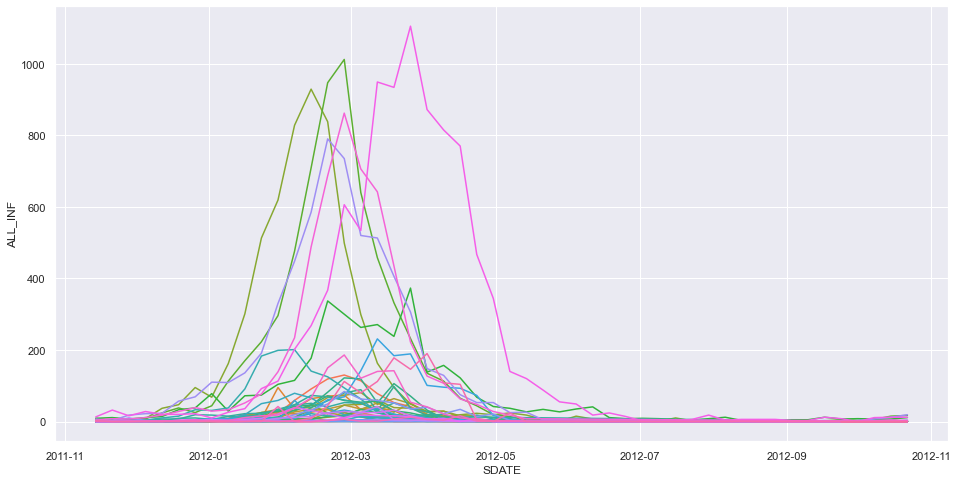

In [161]:
# Let's move those date ranges to remove the flu free regions and show all of the flu region for this 'season'
df6 = (df5.groupby('SDATE').sum()['ALL_INF']>0)
flu_dates = df6.index[df6==True]
df6 = df5[(df5['SDATE']> min(flu_dates))&(df5['SDATE']< max(flu_dates))]
plot_countries(df6)

In [ ]:
# Factor in population